In [1]:
%matplotlib inline
import os
import sys

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import rtmtools.lblrtm.visualisation as viz

from IPython import display

In [2]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'n2o',
                       'band06_wn_1100_1215',
                       'P_500_T_250',
                       '1.e-19')
                       
path_dgdgs = os.path.join(dir_run, 'dgdgs.dat')
path_absmean = os.path.join(dir_run, 'absmean.dat')
path_fluxg = os.path.join(dir_run, 'output_fluxg.dat')
path_coolrg = os.path.join(dir_run, 'output_coolrg.dat')
path_flux = os.path.join(dir_run, 'output_flux.dat')
path_coolr = os.path.join(dir_run, 'output_coolr.dat')
                       

In [15]:
dir_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/clirad/LW/examples',
                          '1_0912_mdc_Steve_CLIRAD_lw',
                          'g1_threshold',
                          'n2o',
                          'band06_wn_1100_1215',
                          'P_500_T_250',
                          '1.e-19',
                          'dgs')

path_coolr_k1 = os.path.join(dir_clirad, 'b07_coolr_k1.txt')
path_coolr_k2 = os.path.join(dir_clirad, 'b07_coolr_k2.txt')
path_coolr_k3 = os.path.join(dir_clirad, 'b07_coolr_k3.txt')
path_coolr_k4 = os.path.join(dir_clirad, 'b07_coolr_k4.txt')

path_sfd_k1 = os.path.join(dir_clirad, 'b07_sfd_k1.txt')
path_sfd_k2 = os.path.join(dir_clirad, 'b07_sfd_k2.txt')
path_sfd_k3 = os.path.join(dir_clirad, 'b07_sfd_k3.txt')
path_sfd_k4 = os.path.join(dir_clirad, 'b07_sfd_k4.txt')

path_sfu_k1 = os.path.join(dir_clirad, 'b07_sfu_k1.txt')
path_sfu_k2 = os.path.join(dir_clirad, 'b07_sfu_k2.txt')
path_sfu_k3 = os.path.join(dir_clirad, 'b07_sfu_k3.txt')
path_sfu_k4 = os.path.join(dir_clirad, 'b07_sfu_k4.txt')

path_fnet_k1 = os.path.join(dir_clirad, 'b07_fnet_k1.txt')
path_fnet_k2 = os.path.join(dir_clirad, 'b07_fnet_k2.txt')
path_fnet_k3 = os.path.join(dir_clirad, 'b07_fnet_k3.txt')
path_fnet_k4 = os.path.join(dir_clirad, 'b07_fnet_k4.txt')

In [3]:
# load fluxg
df = pd.read_csv(path_fluxg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'].isel(g=0))
ds_fluxg = ds

In [4]:
# load coolrg
df = pd.read_csv(path_coolrg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['layer'] = ('pressure', ds['layer'].isel(g=0))
ds_coolrg = ds

In [5]:
# load flux
df = pd.read_csv(path_flux, sep=r'\s+')
df = df.set_index(['pressure'])
ds = xr.Dataset.from_dataframe(df)
ds_flux = ds.set_coords(['level'])

In [6]:
# load coolr
df = pd.read_csv(path_coolr, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_coolr = ds.set_coords(['layer'])

In [7]:
# load absmean
df = pd.read_csv(path_absmean, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_absmean = ds.set_coords(['layer'])

In [8]:
# load dgdgs
df = pd.read_csv(path_dgdgs, sep=r'\s+')
df = df.set_index(['g'])

ds_dgdgs = xr.Dataset.from_dataframe(df)

In [16]:
# load clirad's fluxg
paths_flug = [path_sfu_k1, path_sfu_k2, path_sfu_k3, path_sfu_k4]
paths_fldg = [path_sfd_k1, path_sfd_k2, path_sfd_k3, path_sfd_k4]
paths_fnetg = [path_fnet_k1, path_fnet_k2, path_fnet_k3, path_fnet_k4]

df_flug = pd.concat([pd.read_csv(path, header=None)
                     for path in paths_flug], axis=1)
df_fldg = pd.concat([pd.read_csv(path, header=None)
                     for path in paths_fldg], axis=1)
df_fnetg = pd.concat([pd.read_csv(path, header=None)
                      for path in paths_fnetg], axis=1)

ds = xr.Dataset()
ds.coords['pressure'] = ('pressure', ds_fluxg.coords['pressure'])
ds.coords['g'] = ('g', ds_fluxg.coords['g'])
ds.coords['level'] = ('pressure', range(1, ds_fluxg.dims['pressure'] + 1))
ds['flug'] = (('pressure', 'g'), df_flug)
ds['fldg'] = (('pressure', 'g'), df_fldg)
ds['fnetg'] = (('pressure', 'g'), df_fnetg)

ds_fluxg_clirad = ds

In [17]:
# load clirad's coolrg
paths_coolrg = [path_coolr_k1, 
                path_coolr_k2, 
                path_coolr_k3, 
                path_coolr_k4]

df_coolrg = pd.concat([pd.read_csv(path, header=None) 
                       for path in paths_coolrg], axis=1)

ds = xr.Dataset()
ds.coords['pressure'] = ('pressure', ds_coolrg.coords['pressure'])
ds.coords['g'] = ('g', ds_coolrg.coords['g'])
ds.coords['layer'] = ('pressure', 
                      range(1, ds_coolrg.dims['pressure'] + 1))
ds['coolrg'] = (('pressure', 'g'), df_coolrg)

ds_coolrg_clirad = ds

In [10]:
# write out absmean into CLIRAD-compatible input files
for g in ds_absmean.coords['g']:
    if g == 1:
        ds_absmean['absmean'].sel(g=g).to_pandas()\
        .to_csv('group{g:d}_mean{g:d}k.txt'.format(g=int(g)), 
                sep=' ', index=None)
    else:
        ds_absmean['absmeanlog'].sel(g=g).to_pandas()\
        .to_csv('group{g:d}_mean{g:d}k.txt'.format(g=int(g)), 
                sep=' ', index=None)

In [14]:
print()
print('dgs')

display.display(ds_dgdgs['dgs'].to_dataframe())

ds_dgdgs['dg'].to_pandas().to_csv('dg.dat', sep=' ', index=None)
ds_dgdgs['dgs'].to_pandas().to_csv('dgs.dat', sep=' ', index=None)




dgs


,dgs
g,
1,1
2,0
3,0
4,0


In [12]:
print()
print('Mean absorption coefficient')

ds_absmean.to_dataframe().unstack(0)


Mean absorption coefficient


layer                   absmean             absmeanlog         
g               1   2   3   4             1  2  3  4             1  2  3  4
pressure                                                                   
0.000312        1   1   1   1  2.546506e-21  0  0  0  2.641968e-28  0  0  0
0.000750        2   2   2   2  2.547435e-21  0  0  0  1.555083e-27  0  0  0
0.001052        3   3   3   3  2.549381e-21  0  0  0  2.434827e-27  0  0  0
0.001476        4   4   4   4  2.551452e-21  0  0  0  3.311088e-27  0  0  0
0.002070        5   5   5   5  2.553541e-21  0  0  0  4.500216e-27  0  0  0
0.002904        6   6   6   6  2.555649e-21  0  0  0  6.116769e-27  0  0  0
0.004074        7   7   7   7  2.557779e-21  0  0  0  8.316754e-27  0  0  0
0.005714        8   8   8   8  2.559939e-21  0  0  0  1.131313e-26  0  0  0
0.008015        9   9   9   9  2.562137e-21  0  0  0  1.539731e-26  0  0  0
0.011243       10  10  10  10  2.564384e-21  0  0  0  2.096852e-26  0  0  0
0.015771       11  11  11  11  2.566699e-21  0  0  0  2.857423e-26  0  0  0
0.022122       12  12  12  12  2.569103e-21  0  0  0  3.896617e-26  0  0  0
0.031031       13  13  13  13  2.571632e-21  0  0  0  5.317765e-26  0  0  0
0.043528       14  14  14  14  2.574468e-21  0  0  0  7.267006e-26  0  0  0
0.061057       15  15  15  15  2.581952e-21  0  0  0  1.011169e-25  0  0  0
0.085645       16  16  16  16  2.601268e-21  0  0  0  1.469856e-25  0  0  0
0.120136       17  17  17  17  2.626528e-21  0  0  0  2.194349e-25  0  0  0
0.168516       18  18  18  18  2.652849e-21  0  0  0  3.278558e-25  0  0  0
0.236379       19  19  19  19  2.681101e-21  0  0  0  4.894802e-25  0  0  0
0.331549       20  20  20  20  2.710764e-21  0  0  0  7.299193e-25  0  0  0
0.465100       21  21  21  21  2.740438e-21  0  0  0  1.086580e-24  0  0  0
0.652400       22  22  22  22  2.772519e-21  0  0  0  1.614731e-24  0  0  0
0.915100       23  23  23  23  2.801291e-21  0  0  0  2.352271e-24  0  0  0
1.283650       24  24  24  24  2.812010e-21  0  0  0  3.219008e-24  0  0  0
1.800600       25  25  25  25  2.807837e-21  0  0  0  4.164431e-24  0  0  0
2.525700       26  26  26  26  2.804822e-21  0  0  0  5.308844e-24  0  0  0
3.542800       27  27  27  27  2.808516e-21  0  0  0  6.751979e-24  0  0  0
4.969550       28  28  28  28  2.820668e-21  0  0  0  8.594348e-24  0  0  0
6.970850       29  29  29  29  2.839046e-21  0  0  0  1.096926e-23  0  0  0
9.778100       30  30  30  30  2.863364e-21  0  0  0  1.403654e-23  0  0  0
...           ...  ..  ..  ..           ... .. .. ..           ... .. .. ..
311.637500     46  46  46  46  2.958469e-21  0  0  0  2.222487e-22  0  0  0
335.412490     47  47  47  47  2.964300e-21  0  0  0  2.408158e-22  0  0  0
359.187500     48  48  48  48  2.970112e-21  0  0  0  2.592331e-22  0  0  0
382.962510     49  49  49  49  2.975882e-21  0  0  0  2.774724e-22  0  0  0
406.737500     50  50  50  50  2.980508e-21  0  0  0  2.953904e-22  0  0  0
430.512500     51  51  51  51  2.984910e-21  0  0  0  3.130206e-22  0  0  0
454.287490     52  52  52  52  2.989255e-21  0  0  0  3.303377e-22  0  0  0
478.062500     53  53  53  53  2.993523e-21  0  0  0  3.473192e-22  0  0  0
501.837490     54  54  54  54  2.997715e-21  0  0  0  3.639739e-22  0  0  0
525.612490     55  55  55  55  3.001842e-21  0  0  0  3.803295e-22  0  0  0
549.387510     56  56  56  56  3.005916e-21  0  0  0  3.964140e-22  0  0  0
573.162510     57  57  57  57  3.009945e-21  0  0  0  4.122464e-22  0  0  0
596.937500     58  58  58  58  3.013932e-21  0  0  0  4.278393e-22  0  0  0
620.712490     59  59  59  59  3.017881e-21  0  0  0  4.432004e-22  0  0  0
644.487490     60  60  60  60  3.021791e-21  0  0  0  4.583346e-22  0  0  0
668.262510     61  61  61  61  3.025186e-21  0  0  0  4.731717e-22  0  0  0
692.037510     62  62  62  62  3.028244e-21  0  0  0  4.877372e-22  0  0  0
715.812500     63  63  63  63  3.031286e-21  0  0  0  5.020817e-22  0  0  0
739.587490     64  64  64  64  3.034307e-21  0  0  0  5.1620

In [18]:
def summary_fluxg(ps=None):
    if not ps:
        ps = [0, 75]
        
    dict_ds = {'crd': ds_fluxg, 'clirad': ds_fluxg_clirad}
    dict_df = {case: ds.isel(pressure=ps).to_dataframe()
               for case, ds in dict_ds.items()}    
    dict_df = {case: df.set_index(['level'], append=True)
               for case, df in dict_df.items()}
    return dict_df



    
def summary_flux(ps=None):
    if not ps:
        ps = [0, 75]
    
    dict_ds = {'crd': ds_fluxg, 'clirad': ds_fluxg_clirad}
    dict_df = {case: ds.sum('g').isel(pressure=ps).to_dataframe()
               for case, ds in dict_ds.items()}
    dict_df = {case: df.set_index(['level'], append=True)
               for case, df in dict_df.items()}
    return dict_df
    
    
    
    
def summary_coolrg(ps=None):
    if not ps:
        ps = [0, 74]
        
    dict_ds = {'crd': ds_coolrg, 'clirad': ds_coolrg_clirad}
    dict_df = {case: ds.isel(pressure=ps).to_dataframe()
               for case, ds in dict_ds.items()}
    dict_df = {case: df.set_index(['layer'], append=True)
               for case, df in dict_df.items()}
    return dict_df
    
    
    
def summary_coolr(ps=None):
    if not ps:
        ps = [0, 74]
        
    dict_ds = {'crd': ds_coolrg, 'clirad': ds_coolrg_clirad}
    dict_df = {case: ds.sum('g').isel(pressure=ps).to_dataframe()
               for case, ds in dict_ds.items()}
    dict_df = {case: df.set_index(['layer'], append=True)
               for case, df in dict_df.items()}
    return dict_df
    

def print_diff_benchmark(dict_df, 
                         benchmark='crd', 
                         title='Untitled'):
        
    print(title)
    
    othercases = [case for case in dict_df.keys()]
    othercases.remove(benchmark)   

    print(benchmark)
    display.display(dict_df[benchmark])
    
    for case in othercases:
        print(case)
        display.display(dict_df[case])

    for case in othercases:
        print('{} - {}'.format(case, benchmark))
        display.display(dict_df[case] - dict_df[benchmark])






Plot: Cooling rates


/nuwa_cluster/home/jackyu/locally_installed_python_pacakges/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


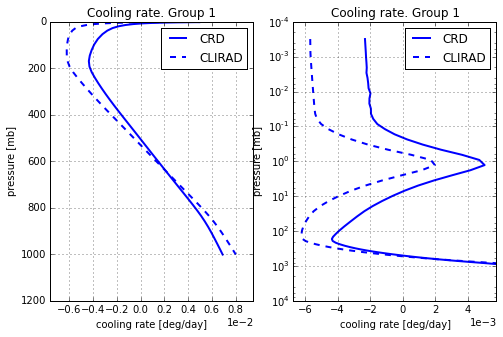

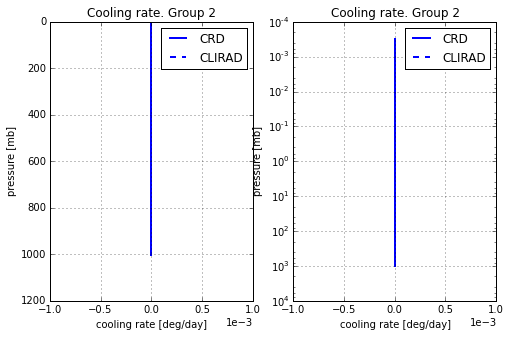

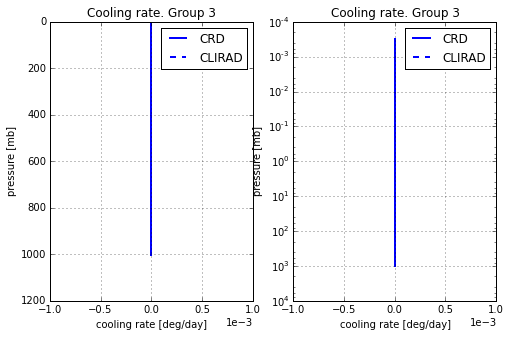

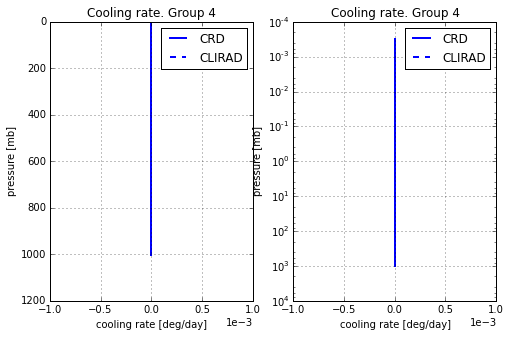

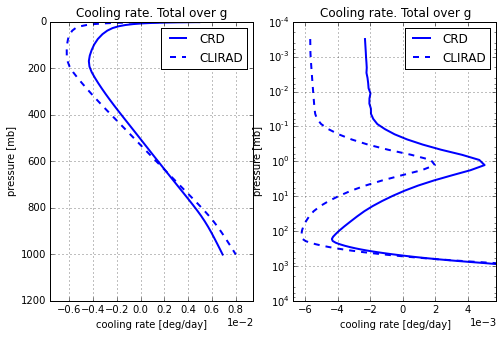

In [28]:
print(3*'\n')
print('Plot: Cooling rates')


for g in ds_coolrg.coords['g']:
    srs_crd = ds_coolrg['coolrg'].sel(g=g).to_pandas()
    srs_clirad = ds_coolrg_clirad['coolrg'].sel(g=g).to_pandas()
    
    srss = [srs_crd, srs_clirad]
    names = ['CRD', 'CLIRAD']
    colours = ['b', 'b']
    linestyles = ['-', '--']
    
    xlabel = 'cooling rate [deg/day]'
    ylabel = 'pressure [mb]'
    title = 'Cooling rate. Group {}'.format(int(g))
    
    fig = viz.plot_pdseries_indexVSvalues_linearlog(srss=srss,
                                                    names=names,
                                                    colours=colours,
                                                    linestyles=linestyles,
                                                    xlabel=xlabel,
                                                    ylabel=ylabel,
                                                    title=title)
    

srs_crd = ds_coolrg['coolrg'].sum('g').to_pandas()
srs_clirad = ds_coolrg_clirad['coolrg'].sum('g').to_pandas()

srss = [srs_crd, srs_clirad]
title = 'Cooling rate. Total over g'
fig = viz.plot_pdseries_indexVSvalues_linearlog(srss=srss,
                                                names=names,
                                                colours=colours,
                                                linestyles=linestyles,
                                                xlabel=xlabel,
                                                ylabel=ylabel,
                                                title=title)

In [20]:
print(3 * '\n')
print_diff_benchmark(summary_fluxg(), 
                     benchmark='crd', 
                     title='Flux. Individual g')





Flux. Individual g
crd


flug      fldg      fnetg
g pressure level                                
1 0        1     -22.904609  0.000000 -22.904609
  1013     76    -23.269656  0.431222 -22.838434
2 0        1       0.000000  0.000000   0.000000
  1013     76      0.000000  0.000000   0.000000
3 0        1       0.000000  0.000000   0.000000
  1013     76      0.000000  0.000000   0.000000
4 0        1       0.000000  0.000000   0.000000
  1013     76      0.000000  0.000000   0.000000

clirad


flug          fldg      fnetg
g pressure level                                    
1 0        1     -23.256526  6.552225e-11 -23.256526
  1013     76    -23.740602  4.798172e-01 -23.260785
2 0        1       0.000000  0.000000e+00   0.000000
  1013     76      0.000000  0.000000e+00   0.000000
3 0        1       0.000000  0.000000e+00   0.000000
  1013     76      0.000000  0.000000e+00   0.000000
4 0        1       0.000000  0.000000e+00   0.000000
  1013     76      0.000000  0.000000e+00   0.000000

clirad - crd


flug          fldg     fnetg
g pressure level                                  
1 0        1     -0.351917  6.552225e-11 -0.351917
  1013     76    -0.470946  4.859481e-02 -0.422351
2 0        1      0.000000  0.000000e+00  0.000000
  1013     76     0.000000  0.000000e+00  0.000000
3 0        1      0.000000  0.000000e+00  0.000000
  1013     76     0.000000  0.000000e+00  0.000000
4 0        1      0.000000  0.000000e+00  0.000000
  1013     76     0.000000  0.000000e+00  0.000000

In [21]:
print(3 * '\n')
print_diff_benchmark(summary_flux(),
                     benchmark='crd',
                     title='Flux. Total over g')





Flux. Total over g
crd


,,flug,fldg,fnetg
pressure,level,,,
0,1,-22.904609,0.000000,-22.904609
1013,76,-23.269656,0.431222,-22.838434


clirad


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.256526,6.552225e-11,-23.256526
1013,76,-23.740602,4.798172e-01,-23.260785


clirad - crd


,,flug,fldg,fnetg
pressure,level,,,
0,1,-0.351917,6.552225e-11,-0.351917
1013,76,-0.470946,4.859481e-02,-0.422351


In [22]:
print(3 * '\n')
print_diff_benchmark(summary_coolrg(),
                     benchmark='crd', 
                     title='Cooling rate. Individual g.')





Cooling rate. Individual g.
crd


coolrg
g pressure    layer          
1 0.000312    1     -0.002322
  1001.112500 75     0.006910
2 0.000312    1      0.000000
  1001.112500 75     0.000000
3 0.000312    1      0.000000
  1001.112500 75     0.000000
4 0.000312    1      0.000000
  1001.112500 75     0.000000

clirad


coolrg
g pressure    layer          
1 0.000312    1     -0.005685
  1001.112500 75     0.008019
2 0.000312    1      0.000000
  1001.112500 75     0.000000
3 0.000312    1      0.000000
  1001.112500 75     0.000000
4 0.000312    1      0.000000
  1001.112500 75     0.000000

clirad - crd


coolrg
g pressure    layer          
1 0.000312    1     -0.003363
  1001.112500 75     0.001110
2 0.000312    1      0.000000
  1001.112500 75     0.000000
3 0.000312    1      0.000000
  1001.112500 75     0.000000
4 0.000312    1      0.000000
  1001.112500 75     0.000000

In [23]:
print(3 * '\n')
print_diff_benchmark(summary_coolr(), 
                     benchmark='crd', 
                     title='Cooling rate. Total over g')





Cooling rate. Total over g
crd


,,coolrg
pressure,layer,
0.000312,1,-0.002322
1001.112500,75,0.006910


clirad


,,coolrg
pressure,layer,
0.000312,1,-0.005685
1001.112500,75,0.008019


clirad - crd


,,coolrg
pressure,layer,
0.000312,1,-0.003363
1001.112500,75,0.001110


In [24]:
def display_fluxg_dataframe(direction='up', models=['crd', 'clirad']):
    dict_models = {'crd': ds_fluxg, 'clirad': ds_fluxg_clirad}
    dict_dirs = {'up': 'flug', 'down': 'fldg', 'net': 'fnetg'}
    
    df = pd.concat([dict_models[model][dict_dirs[direction]]\
                    .to_dataframe()
                    for model in models],
                   axis=1, keys=models)
    return df


def display_coolrg_dataframe(models=['crd', 'clirad']):
    dict_models = {'crd': ds_coolrg, 'clirad': ds_coolrg_clirad}
    
    df = pd.concat([dict_models[model]['coolrg'].to_dataframe() 
                    for model in models],
                   axis=1, keys=models)
    return df

In [25]:
df_fldg = display_fluxg_dataframe(direction='down', models=['crd', 'clirad'])
df_flug = display_fluxg_dataframe(direction='up')
df_fnetg = display_fluxg_dataframe(direction='net')

df_all = pd.concat([df_fldg, df_flug, df_fnetg], axis=1)

print(3 * '\n')
print('Flux. Every g, every level.')
df_all





Flux. Every g, every level.


crd               clirad                 crd             \
              level          fldg  level          fldg level       flug   
pressure    g                                                             
0.000000    1     1  0.000000e+00      1  6.552225e-11     1 -22.904609   
            2     1  0.000000e+00      1  0.000000e+00     1   0.000000   
            3     1  0.000000e+00      1  0.000000e+00     1   0.000000   
            4     1  0.000000e+00      1  0.000000e+00     1   0.000000   
0.000624    1     2  4.919955e-08      2  4.097761e-08     2 -22.904609   
            2     2  0.000000e+00      2  0.000000e+00     2   0.000000   
            3     2  0.000000e+00      2  0.000000e+00     2   0.000000   
            4     2  0.000000e+00      2  0.000000e+00     2   0.000000   
0.000876    1     3  6.925985e-08      3  5.767996e-08     3 -22.904609   
            2     3  0.000000e+00      3  0.000000e+00     3   0.000000   
            3     3  0.000000e+00      3  0.000000e+00     3   0.000000   
            4     3  0.000000e+00      3  0.000000e+00     3   0.000000   
0.001229    1     4  9.784597e-08      4  8.151940e-08     4 -22.904610   
            2     4  0.000000e+00      4  0.000000e+00     4   0.000000   
            3     4  0.000000e+00      4  0.000000e+00     4   0.000000   
            4     4  0.000000e+00      4  0.000000e+00     4   0.000000   
0.001723    1     5  1.387939e-07      5  1.157404e-07     5 -22.904610   
            2     5  0.000000e+00      5  0.000000e+00     5   0.000000   
            3     5  0.000000e+00      5  0.000000e+00     5   0.000000   
            4     5  0.000000e+00      5  0.000000e+00     5   0.000000   
0.002417    1     6  1.974525e-07      6  1.648681e-07     6 -22.904610   
            2     6  0.000000e+00      6  0.000000e+00     6   0.000000   
            3     6  0.000000e+00      6  0.000000e+00     6   0.000000   
            4     6  0.000000e+00      6  0.000000e+00     6   0.000000   
0.003391    1     7  2.814852e-07      7  2.353993e-07     7 -22.904610   
            2     7  0.000000e+00      7  0.000000e+00     7   0.000000   
            3     7  0.000000e+00      7  0.000000e+00     7   0.000000   
            4     7  0.000000e+00      7  0.000000e+00     7   0.000000   
0.004757    1     8  4.018629e-07      8  3.366550e-07     8 -22.904611   
            2     8  0.000000e+00      8  0.000000e+00     8   0.000000   
...             ...           ...    ...           ...   ...        ...   
846.575010  3    69  0.000000e+00     69  0.000000e+00    69   0.000000   
            4    69  0.000000e+00     69  0.000000e+00    69   0.000000   
870.349980  1    70  3.180642e-01     70  3.493342e-01    70 -23.263163   
            2    70  0.000000e+00     70  0.000000e+00    70   0.000000   
            3    70  0.000000e+00     70  0.000000e+00    70   0.000000   
            4    70  0.000000e+00     70  0.000000e+00    70   0.000000   
894.125000  1    71  3.361068e-01     71  3.699942e-01    71 -23.265176   
            2    71  0.000000e+00     71  0.000000e+00    71   0.000000   
            3    71  0.000000e+00     71  0.000000e+00    71   0.000000   
            4    71  0.000000e+00     71  0.000000e+00    71   0.000000   
917.900020  1    72  3.544983e-01     72  3.911133e-01    72 -23.266800   
            2    72  0.000000e+00     72  0.000000e+00    72   0.000000   
            3    72  0.000000e+00     72  0.000000e+00    72   0.000000   
            4    72  0.000000e+00     72  0.000000e+00    72   0.000000   
941.674990  1    73  3.732145e-01     73  4.126669e-01    73 -23.268052   
            2    73  0.000000e+00     73  0.000000e+00    73   0.000000   
            3    73  0.000000e+00     73  0.000000e+00    73   0.000000   
            4    73  0.000000e+00     73  0.000000e+00    73   0.000000   
965.450010  1    74  3.922464e-01     74  4.346406e-01    74 -23.268943   
            2    74  0.000000e+00     74 

In [26]:
print(3 * '\n')
print('Cooling rate. Every g, every layer')
display_coolrg_dataframe()





Cooling rate. Every g, every layer


crd           clirad          
              layer    coolrg  layer    coolrg
pressure    g                                 
0.000312    1     1 -0.002322      1 -0.005685
            2     1  0.000000      1  0.000000
            3     1  0.000000      1  0.000000
            4     1  0.000000      1  0.000000
0.000750    1     2 -0.002272      2 -0.005672
            2     2  0.000000      2  0.000000
            3     2  0.000000      2  0.000000
            4     2  0.000000      2  0.000000
0.001052    1     3 -0.002255      3 -0.005658
            2     3  0.000000      3  0.000000
            3     3  0.000000      3  0.000000
            4     3  0.000000      3  0.000000
0.001476    1     4 -0.002232      4 -0.005637
            2     4  0.000000      4  0.000000
            3     4  0.000000      4  0.000000
            4     4  0.000000      4  0.000000
0.002070    1     5 -0.002213      5 -0.005615
            2     5  0.000000      5  0.000000
            3     5  0.000000      5  0.000000
            4     5  0.000000      5  0.000000
0.002904    1     6 -0.002231      6 -0.005592
            2     6  0.000000      6  0.000000
            3     6  0.000000      6  0.000000
            4     6  0.000000      6  0.000000
0.004074    1     7 -0.002166      7 -0.005569
            2     7  0.000000      7  0.000000
            3     7  0.000000      7  0.000000
            4     7  0.000000      7  0.000000
0.005714    1     8 -0.002127      8 -0.005546
            2     8  0.000000      8  0.000000
...             ...       ...    ...       ...
834.687500  3    68  0.000000     68  0.000000
            4    68  0.000000     68  0.000000
858.462490  1    69  0.005406     69  0.006142
            2    69  0.000000     69  0.000000
            3    69  0.000000     69  0.000000
            4    69  0.000000     69  0.000000
882.237490  1    70  0.005692     70  0.006495
            2    70  0.000000     70  0.000000
            3    70  0.000000     70  0.000000
            4    70  0.000000     70  0.000000
906.012510  1    71  0.005954     71  0.006822
            2    71  0.000000     71  0.000000
            3    71  0.000000     71  0.000000
            4    71  0.000000     71  0.000000
929.787510  1    72  0.006201     72  0.007133
            2    72  0.000000     72  0.000000
            3    72  0.000000     72  0.000000
            4    72  0.000000     72  0.000000
953.562500  1    73  0.006441     73  0.007433
            2    73  0.000000     73  0.000000
            3    73  0.000000     73  0.000000
            4    73  0.000000     73  0.000000
977.337490  1    74  0.006676     74  0.007728
            2    74  0.000000     74  0.000000
            3    74  0.000000     74  0.000000
            4    74  0.000000     74  0.000000
1001.112500 1    75  0.006910     75  0.008019
            2    75  0.000000     75  0.000000
            3    75  0.000000     75  0.000000
            4    75  0.000000     75  0.000000

[300 rows x 4 columns]

In [27]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')